In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

customer_type = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Random Forests\\Fraud_check.csv",header=0)
customer_category=[]

for value in customer_type['Taxable.Income']:
    if (value <= 30000) :
        customer_category.append('Risky')
    else:
        customer_category.append('Good')

modified_customer_type=customer_type.drop(['Taxable.Income'],axis=1)
modified_customer_type['Taxable.Income']=pd.Series(customer_category)

encoder=preprocessing.LabelEncoder()
modified_customer_type['Undergrad']=encoder.fit_transform(modified_customer_type['Undergrad'])
modified_customer_type['Marital.Status']=encoder.fit_transform(modified_customer_type['Marital.Status'])
modified_customer_type['Urban']=encoder.fit_transform(modified_customer_type['Urban'])

features=modified_customer_type.columns[0:5]
output=modified_customer_type.columns[5]
modified_customer_type

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [132]:
train_data,test_data = train_test_split(modified_customer_type,test_size = 0.15,random_state=8)

#Random Forest Model Building and Predictions on the Entire Dataset as OOB_Score set to True which
#accounts for predicting missed 1/3th of the data samples in the Bootstrap sample for every Tree which is
#Similar to making each Tree to predict for unseen samples apart from its respective Bootstrap Sample
#OOB_Score tells the performance of the Classifier
model_rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=60,criterion="entropy",bootstrap=True,
                                  max_depth=12, min_samples_split=6,random_state=8)

model_rf.fit(train_data[features],train_data[output])
train_preds = model_rf.predict(train_data[features])
test_preds = model_rf.predict(test_data[features])
print("RandomForest Classifier Performance based on OOB_Score is: ",model_rf.oob_score_)

print(pd.crosstab(train_data[output],train_preds))

RandomForest Classifier Performance based on OOB_Score is:  0.7705882352941177
col_0           Good  Risky
Taxable.Income             
Good             403      0
Risky             57     50


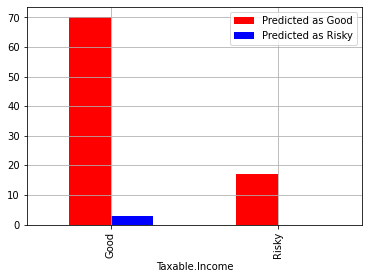

col_0           Good  Risky
Taxable.Income             
Good              70      3
Risky             17      0


In [133]:
#Plot to analyse variation between the Predicted values and the Actual Values on Test Dataset

pd.crosstab(test_data[output],test_preds).plot(kind='bar',color=['red','blue'], grid=True)
plt.legend(['Predicted as Good','Predicted as Risky'])
plt.show()

print(pd.crosstab(test_data[output],test_preds))

In [134]:
#Due to Imbalanced Dataset our model couldn't recognize the pattern to Classify Risky Classlabels Correctly 
#as there were few observations pertaining to 'Risky' Class which is causing the Difference between Train & Test Accuracy

# Train Accuracy
print("Train Accuracy achieved by RFC Algorithm(%): ",np.mean(train_data[output] == train_preds)*100)

# Test Accuracy
print("Test Accuracy achieved by RFC Algorithm(%): ",np.mean(test_preds==test_data[output])*100)

Train Accuracy achieved by RFC Algorithm(%):  88.8235294117647
Test Accuracy achieved by RFC Algorithm(%):  77.77777777777779
